#**Recurrent Neural Networks, Gated Recurrent Unit, and Long Short-Term Memory**



#**This notebook is part of your third and final project for the AI course this semester.Before the start of each part, I have provided instructions. You must follow the instructions for each part**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


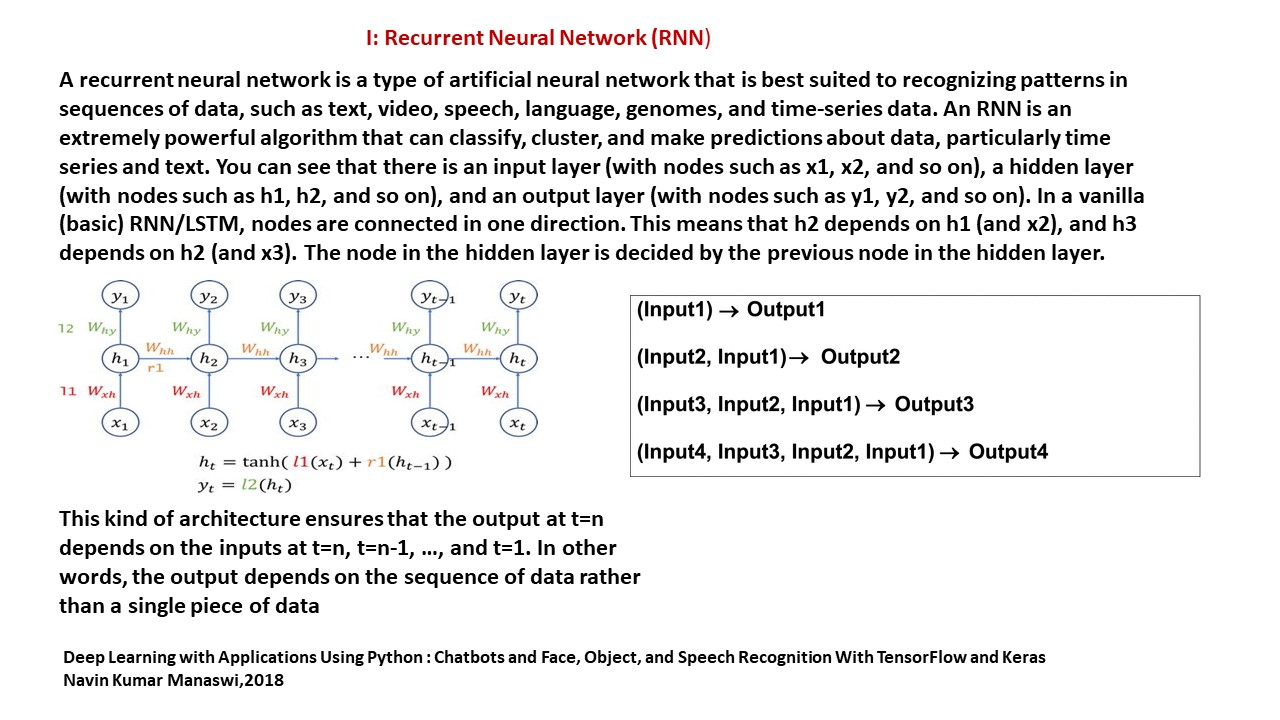

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-1.jpg', width=900,height=900)

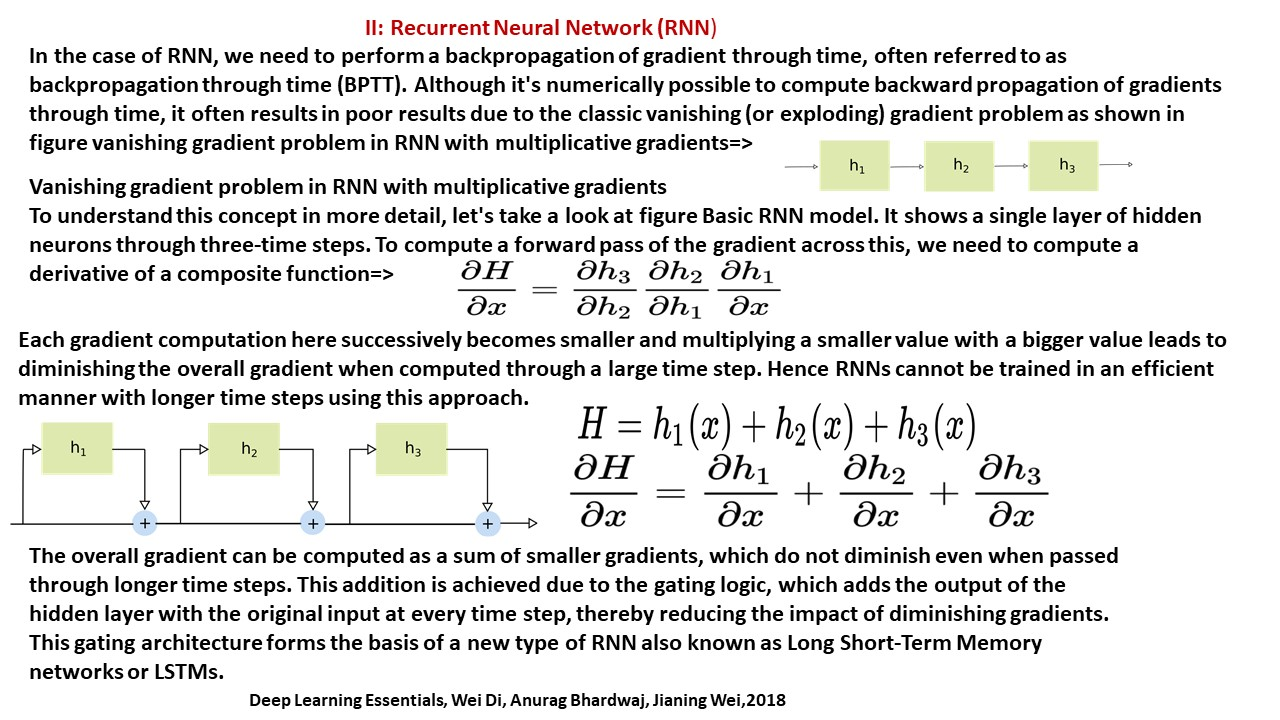

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-2.jpg', width=900,height=900)

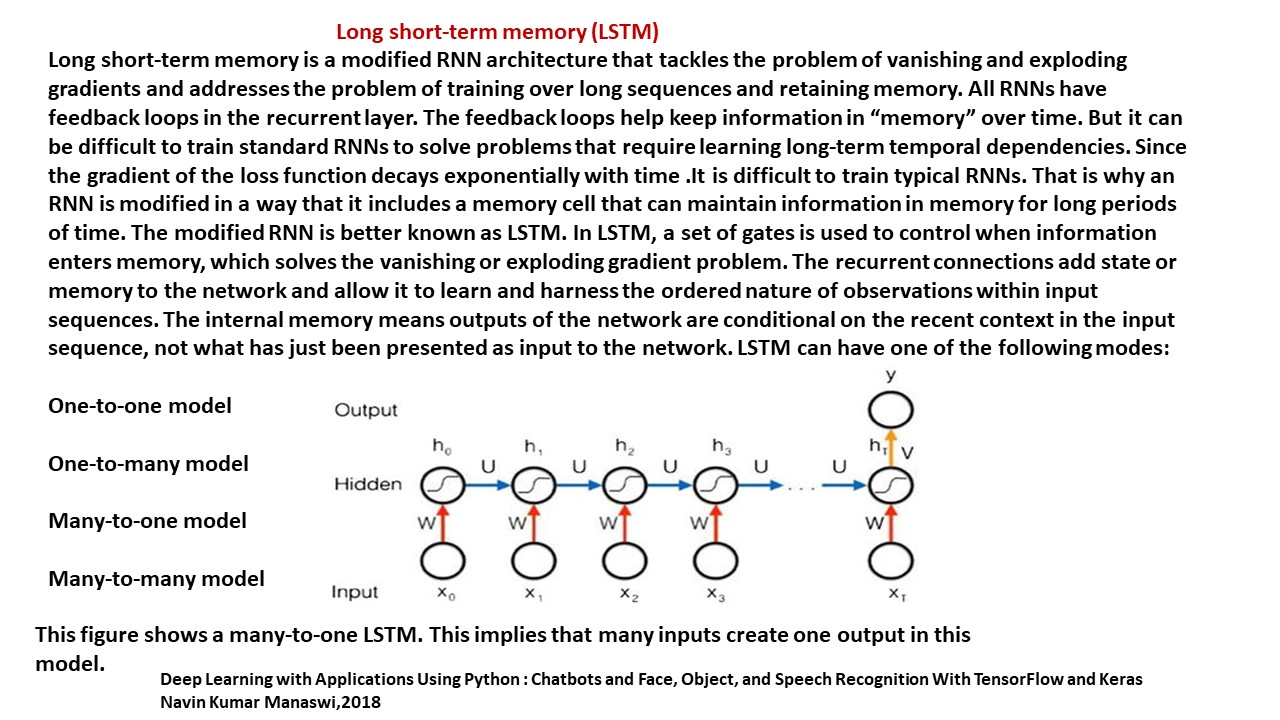

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-3.jpg', width=900,height=900)

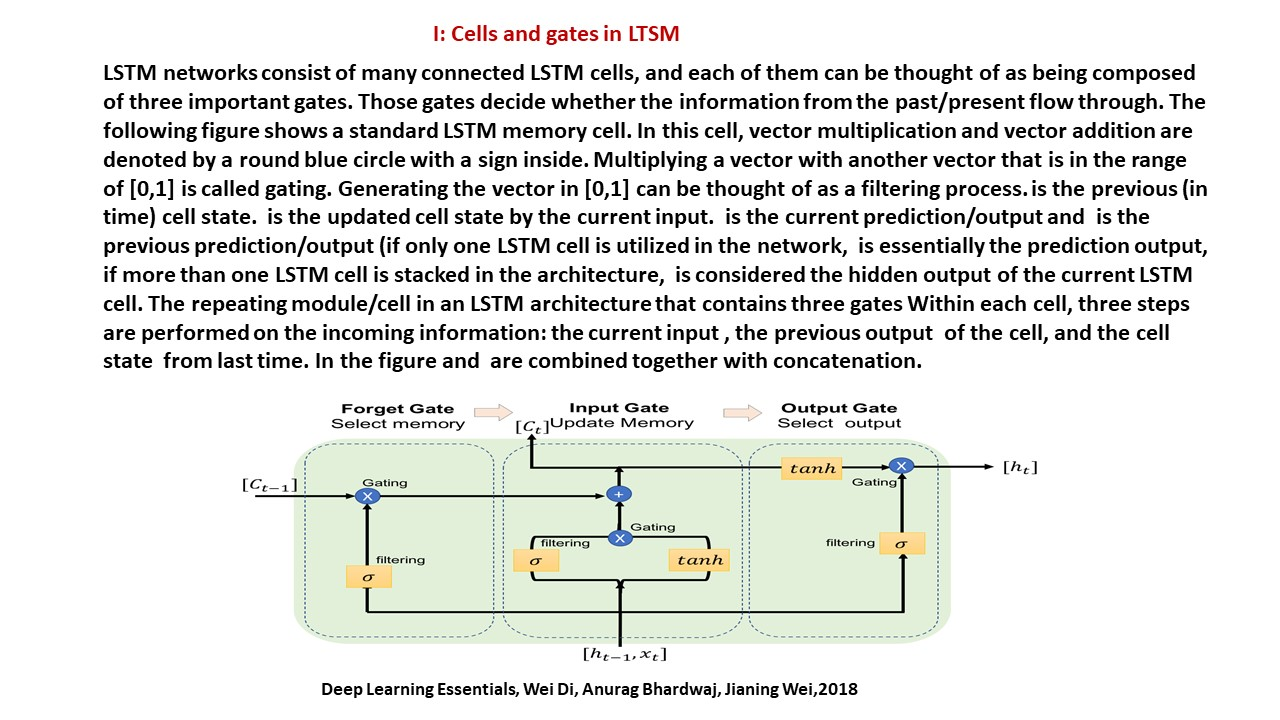

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-4.jpg', width=900,height=900)

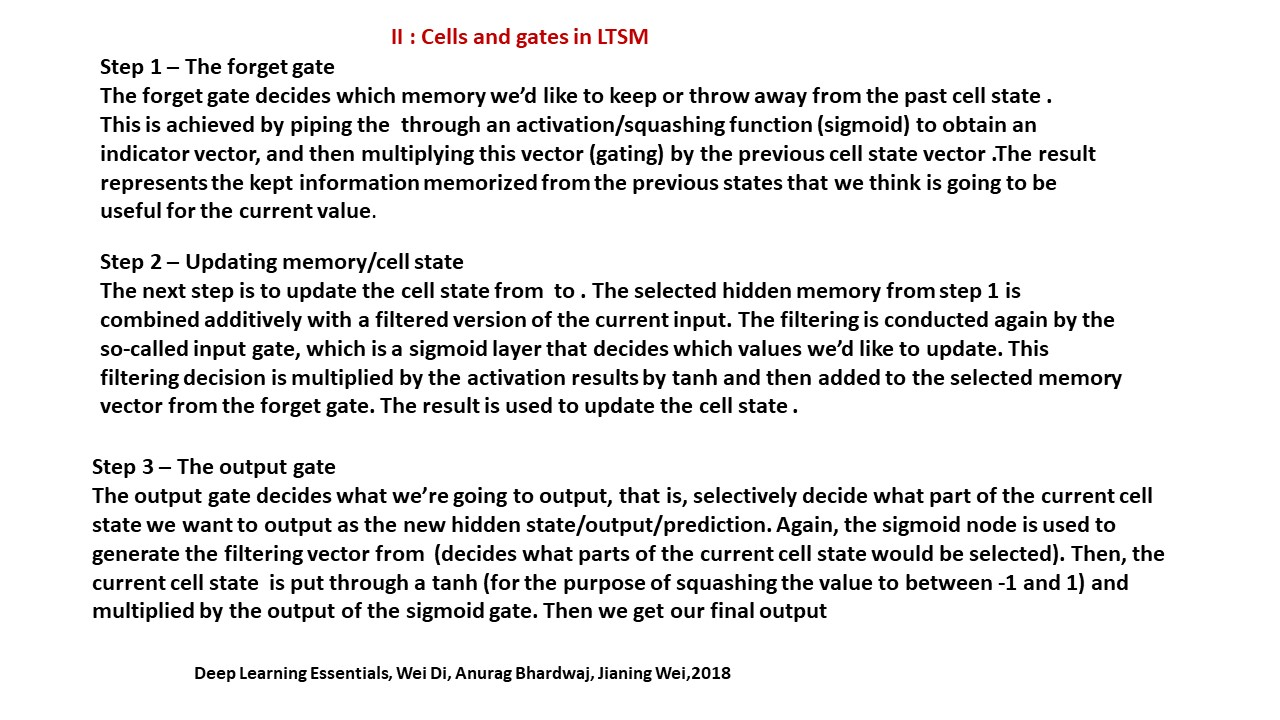

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-5.jpg', width=900,height=900)

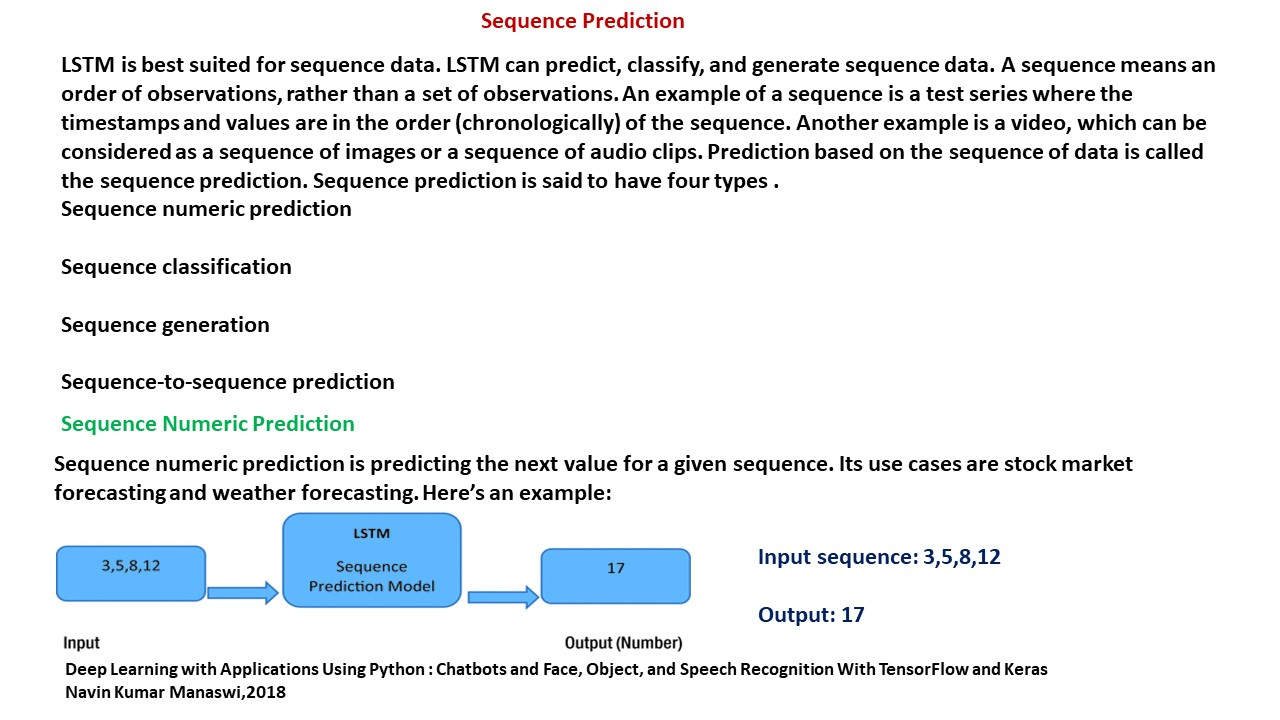

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-6.jpg', width=900,height=900)

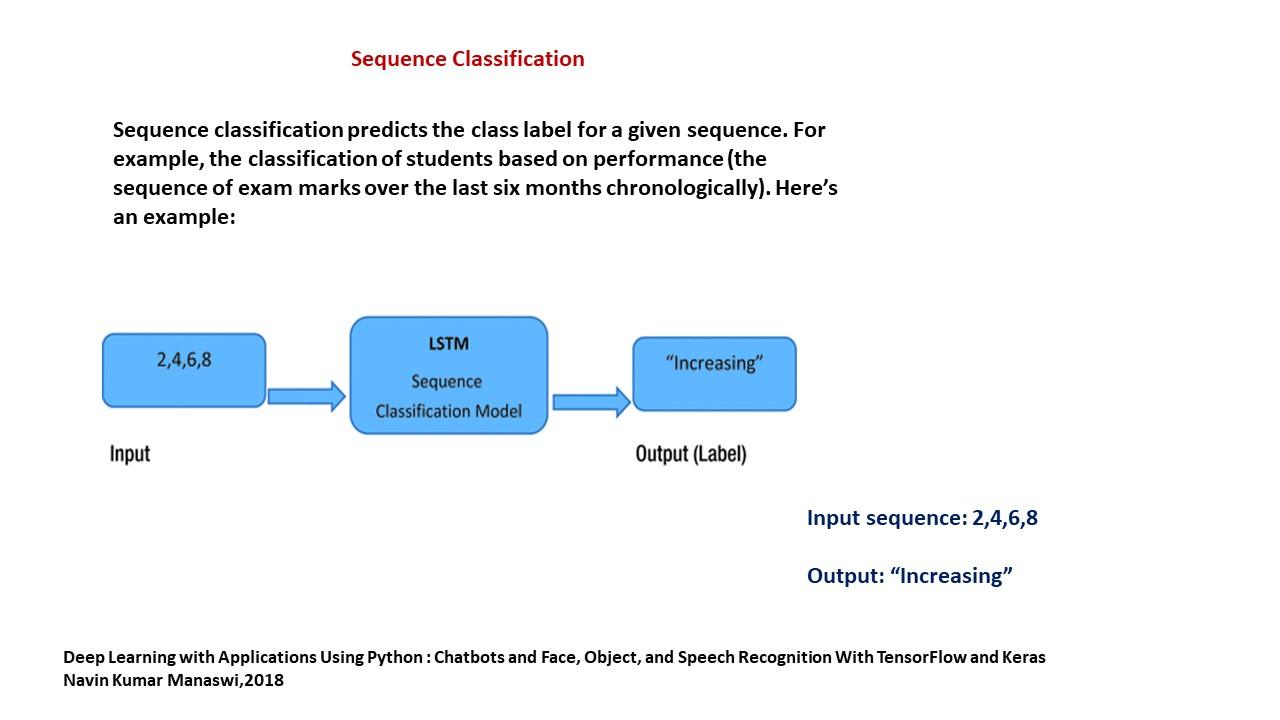

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-7.jpg', width=900,height=900)

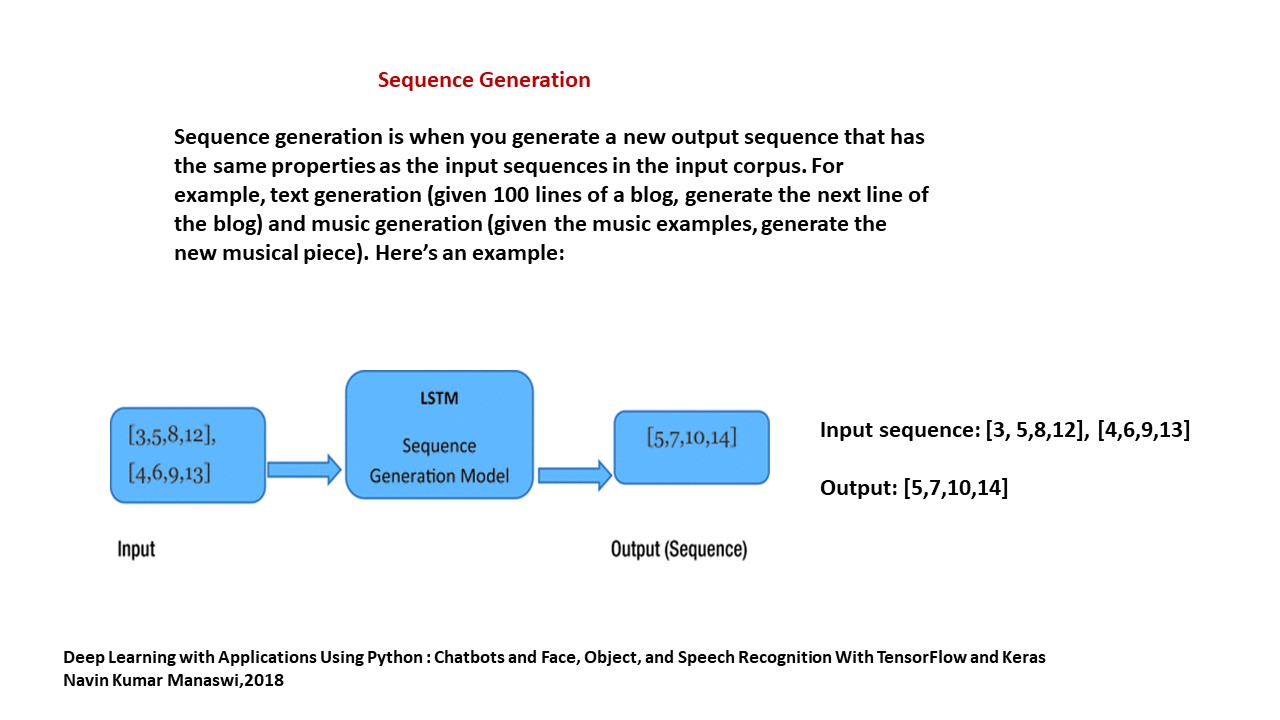

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-8.jpg', width=900,height=900)

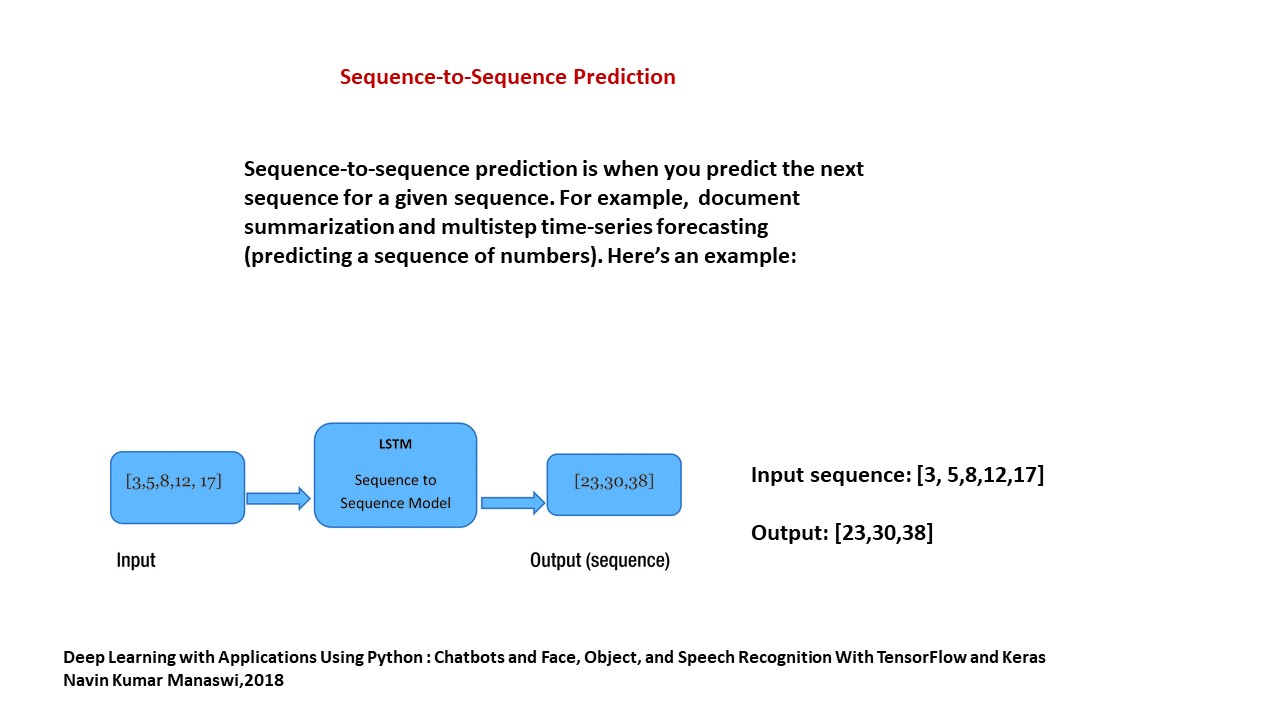

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-9.jpg', width=900,height=900)

#**NOTE 1: In Part I , you must explain all the codes line by line. You should also improve the r2_score(preds, y_test) of the model.**

#**Part I**
#**In this part, we will be using the example data from the Max Planck Institute for Biogeochemistry. The dataset is called the Jena Climate dataset. It contains measurements like temperature, humidity, and more, recorded every 10 minutes. You have a dataset with measures on weather data, and we try to predict the temperature 12 hours (72-time steps of 10 minutes) into the future.We will use only the temperature data and not the other variables. This may make the task slightly harder to accomplish. Note that it is possible to add other explanatory variables into an RNN. For forecasting tomorrow’s temperature, you may want to use not only today’s temperature but also today’s wind direction, wind speed, and humidity, for example. In this case, you could add a third dimension to the input data.**

#**Reference : Advanced Forecasting with Python: With State-of-the-Art-Models Including LSTMs, Facebook’s Prophet, and Amazon’s DeepAR, Joos Korstanje, 2021**

#**1.Import libraries**

In [ ]:
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


from zipfile import ZipFile
import os

with ZipFile('/content/drive/MyDrive/RNN-LSTM/jena_climate_2009_2016.zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/RNN-LSTMN')



#**2.Import our data.**

In [ ]:
csv_path = "/content/drive/MyDrive/RNN-LSTMN/jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

#**3. The next step is to delete all columns other than the temperature, as we are building a univariate model. Keeping only the temperature data.**

In [ ]:
df = df[['T (degC)']]

#**4. We apply the min-max scaler.**

In [ ]:

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])

# **5. We prepare our data and convert the list of lists to numpy array.We need to split the data into a shape in which we have sequences of past data and sequences of future data. We want to predict 72 steps into the future, and we’ll use 3*72 steps into the past. This is an arbitrary choice. You can try out using more or less past data.**

In [ ]:
ylist = list(df['T'])

n_future = 72
n_past = 3*72
total_period = 4*72

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1



X_new = np.array(X_new)
y_new = np.array(y_new)

#**6.We do train test split.**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.10, random_state=42)

In [ ]:
X_train.shape

(378236, 216)

#**7.It takes a long time to run this model. The batch size of 2000 is provided for demonstration purposes. But you need to put a much smaller batch size. Note that The SimpleRNN layer needs an input format that is 3D, and the shape has to correspond to (n_samples, n_timesteps, n_features). This can be obtained using reshape.**

In [ ]:
batch_size = 2000

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )

X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

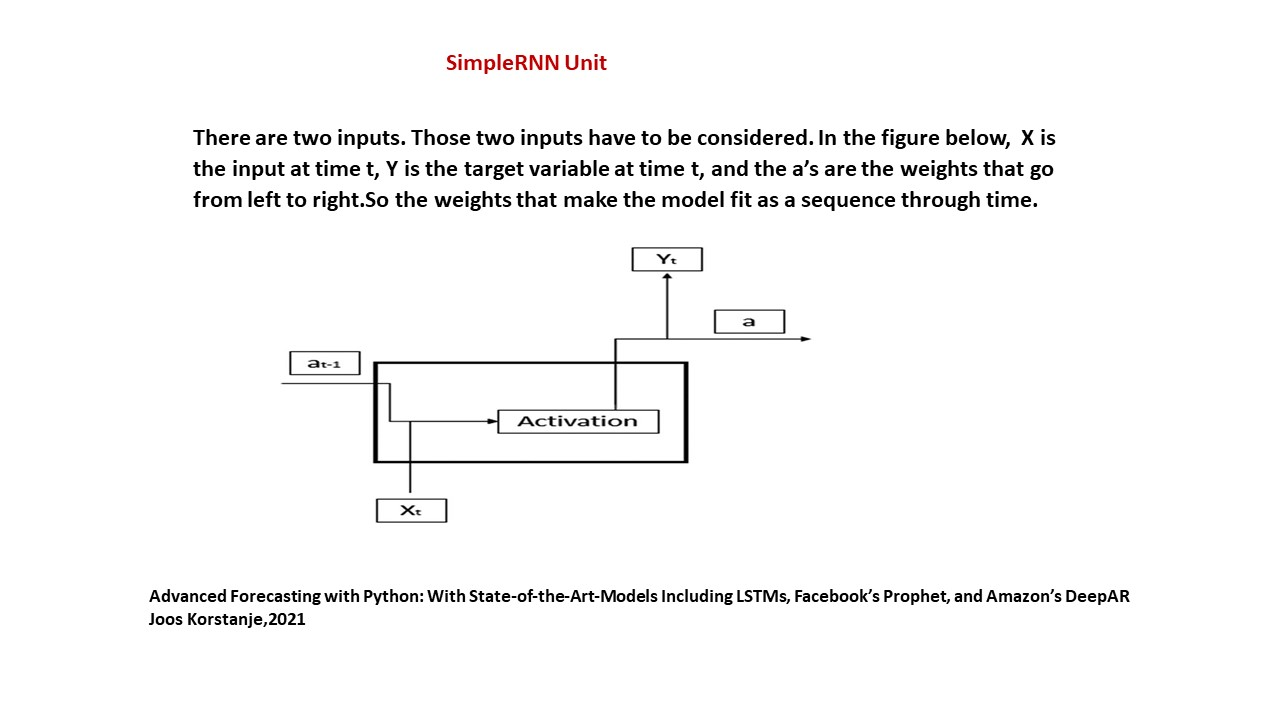

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-NB-1.jpg', width=900,height=900)

#**8.We parameterize a small network with SimpleRNN.**
Line 1: -------
Line 2: -------
Line 3:-------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 216, 8)            80        
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 216, 8)            136       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 136       
                                                                 
 dense (Dense)               (None, 72)                648       
                                                                 
Total params: 1000 (3.91 KB)
Trainable params: 1000 (3.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
152/152 [==============================] - 83s 516ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - val_loss: 0.0464 - val_mean_absolute_erro

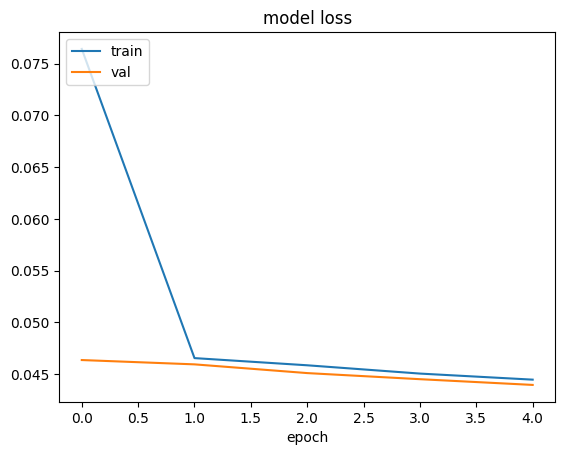

In [ ]:
random.seed(42)

simple_model = Sequential([
  SimpleRNN(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  SimpleRNN(8, activation='tanh', return_sequences = True),
  SimpleRNN(8, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.6811969695969905


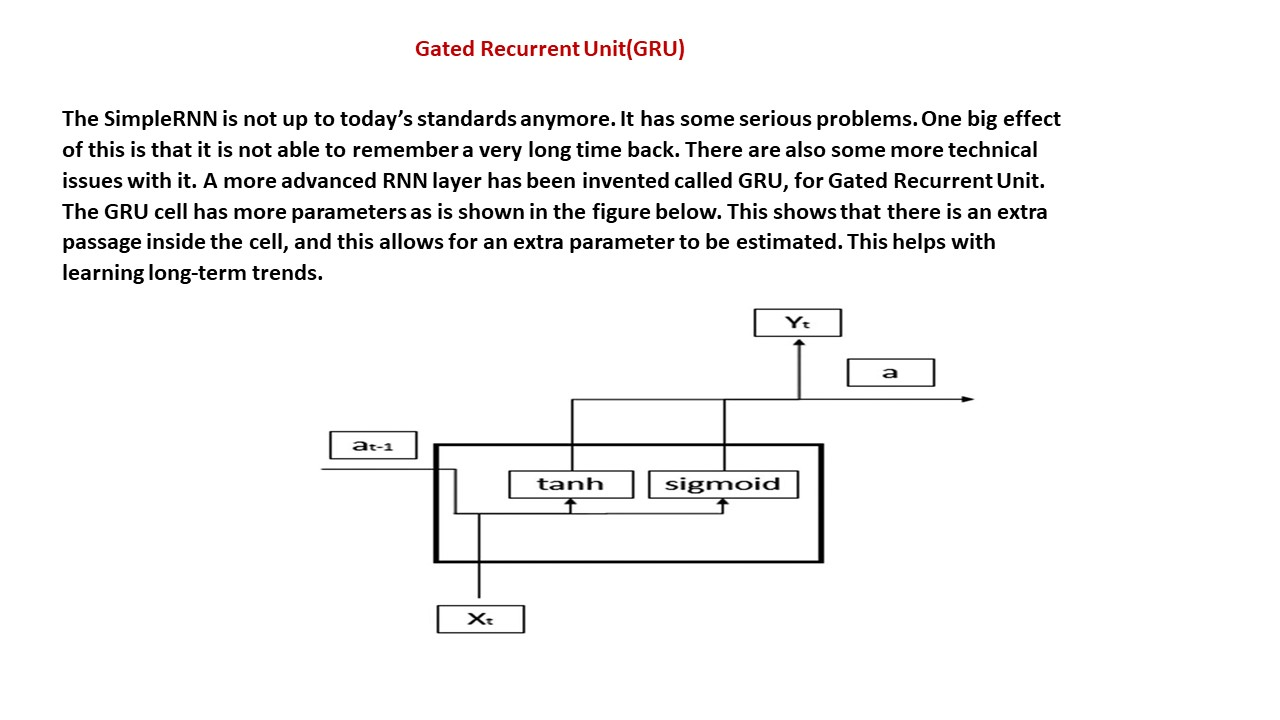

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-NB-2.jpg', width=900,height=900)

#**9.A simple architecture with 1 Gated Recurrent Unit (GRU) layer.**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 72)                648       
                                                                 
Total params: 912 (3.56 KB)
Trainable params: 912 (3.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
152/152 [==============================] - 6s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - val_loss: 0.0476 - val_mean_absolute_error: 0.0476
Epoch 2/5
152/152 [==============================] - 3s 23ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331
Epoch 3/5
152/152 [==============================] - 4s 27ms/step - loss: 0.0307 - mean_abso

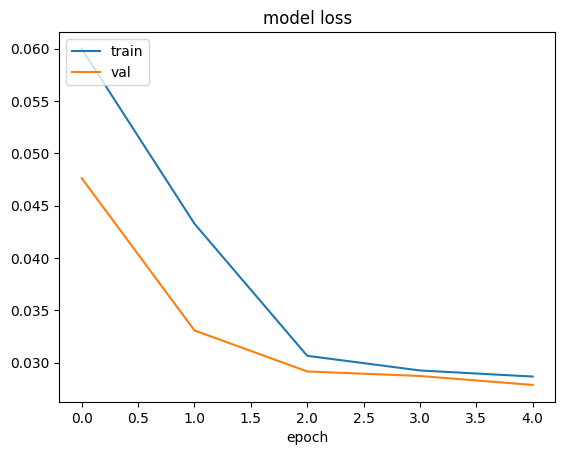

In [ ]:
random.seed(42)
from tensorflow.keras.layers import GRU

simple_model = Sequential([
   GRU(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.9120883477204715


#**10.This is a  more complex network with three layers of Gated Recurrent Unit (GRU).**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 216, 10)           390       
                                                                 
 gru_2 (GRU)                 (None, 216, 10)           660       
                                                                 
 gru_3 (GRU)                 (None, 10)                660       
                                                                 
 dense_2 (Dense)             (None, 72)                792       
                                                                 
Total params: 2502 (9.77 KB)
Trainable params: 2502 (9.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
152/152 [==============================] - 14s 53ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - val_loss: 0.0518 - val_mean_absolute_err

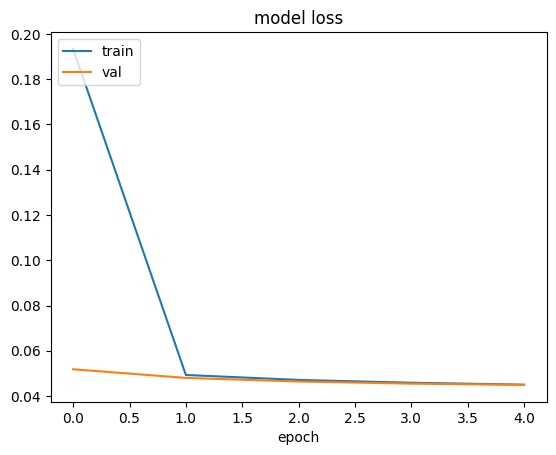

In [ ]:
random.seed(42)

simple_model = Sequential([
   GRU(10, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    GRU(10, activation='tanh', return_sequences=True),
    GRU(10, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.6811969695969905


#**NOTE 2: In Part II, you must explain all the codes line by line. You should also improve the Train Score: 14.93 RMSE and Test Score: 46.19 RMSE of the model.**

#**Part II**
#**In this part, we will employ LSTM.This section uses the stock market data(SP500).**

#**1. Import libraries.**

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# **2. We normalize the dataset and do train and test split.**

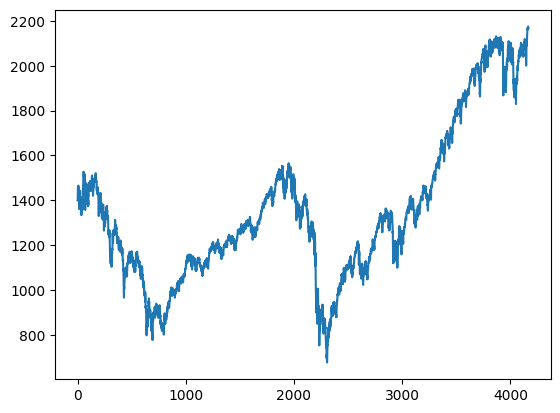

2791 1376


In [ ]:
dataset = pandas.read_csv('/content/drive/MyDrive/RNN-LSTM/sp500.csv', usecols=[0], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [ ]:
print(dataset)

[[0.48240909]
 [0.48420417]
 [0.48509838]
 ...
 [0.99562893]
 [0.99609603]
 [0.99436106]]


# **3. We convert an array of values into a timeseries data.**

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX.shape

(2789, 1)

# **4. We reshape input to be [samples, time steps, features].**

In [ ]:

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# **5.We create and fit the LSTM network.**

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
279/279 - 3s - loss: 0.0512 - 3s/epoch - 11ms/step
Epoch 2/100
279/279 - 1s - loss: 0.0110 - 846ms/epoch - 3ms/step
Epoch 3/100
279/279 - 1s - loss: 0.0083 - 843ms/epoch - 3ms/step
Epoch 4/100
279/279 - 1s - loss: 0.0053 - 953ms/epoch - 3ms/step
Epoch 5/100
279/279 - 1s - loss: 0.0027 - 886ms/epoch - 3ms/step
Epoch 6/100
279/279 - 1s - loss: 9.3482e-04 - 835ms/epoch - 3ms/step
Epoch 7/100
279/279 - 1s - loss: 2.8757e-04 - 1s/epoch - 4ms/step
Epoch 8/100
279/279 - 1s - loss: 1.6674e-04 - 1s/epoch - 4ms/step
Epoch 9/100
279/279 - 1s - loss: 1.5505e-04 - 1s/epoch - 4ms/step
Epoch 10/100
279/279 - 1s - loss: 1.5296e-04 - 840ms/epoch - 3ms/step
Epoch 11/100
279/279 - 1s - loss: 1.5192e-04 - 821ms/epoch - 3ms/step
Epoch 12/100
279/279 - 1s - loss: 1.4965e-04 - 831ms/epoch - 3ms/step
Epoch 13/100
279/279 - 1s - loss: 1.4879e-04 - 832ms/epoch - 3ms/step
Epoch 14/100
279/279 - 1s - loss: 1.4556e-04 - 834ms/epoch - 3ms/step
Epoch 15/100
279/279 - 1s - loss: 1.4387e-04 - 843ms/epoch -

#**6.We rescale predicted values and compute the root mean squared error.**

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

43/43 [==============================] - 0s 2ms/step
Train Score: 14.93 RMSE
Test Score: 46.19 RMSE


# **7. We shift train and test predictions for plotting and plot baseline and predictions.The part in orange is the training data, the part in blue is the test data, and the part in green is the predicted output.**

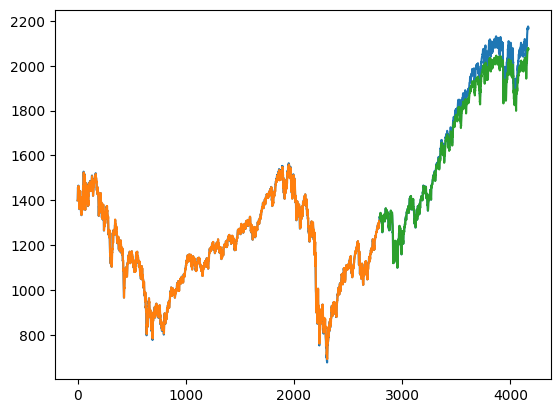

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#**References:**
#**[1] Advanced Forecasting with Python: With State-of-the-Art-Models Including LSTMs, Facebook’s Prophet, and Amazon’s DeepAR, Joos Korstanje, July 2021.**
#**[2]. Deep Learning: Recurrent Neural Networks with Python, AI Sciences, 2021.**
#**[3]. Deep Learning with Applications Using Python : Chatbots and Face, Object, and Speech Recognition With TensorFlow and Keras, Navin Kumar Manaswi, 2018.**
#**[4]. Machine Vision, GANs, and Deep Reinforcement Learning, Jon Krohn, 2020.**
#**[5]. Generating a New Reality: From Autoencoders and Adversarial Networks to Deepfakes, Micheal Lanham, 2021.**
#**[6].Hands-On Mathematics for Deep Learning, Jay Dawani, 2020**
